In [61]:
import numpy as np
import math
import pandas as pd
from sklearn import linear_model

In [62]:
df = pd.read_csv('Train.csv')
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,3745,BMW X5 3.0d,Chennai,2009,150000,Diesel,Automatic,First,11.0 kmpl,2993 CC,235 bhp,5.0,18.75
3746,3746,Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV,Delhi,2012,85000,Diesel,Automatic,First,11.79 kmpl,2179 CC,120 bhp,7.0,6.25
3747,3747,Maruti Wagon R LXI BSII,Ahmedabad,2007,55100,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,1.45
3748,3748,Renault Duster 85PS Diesel RxL,Hyderabad,2014,77500,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.0,6.60


In [63]:
df.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               28
Power                28
Seats                32
Price                 0
dtype: int64

In [64]:
df.dropna(subset=['Seats','Mileage','Engine','Power'], inplace=True)
df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [65]:
dummies_loca = pd.get_dummies(df.Location)
dummies_loca = dummies_loca.astype(int)
df2 = pd.concat([df,dummies_loca],axis='columns')
df3 = df2.drop('Location',axis='columns')

dummies_name = pd.get_dummies(df3.Name)
dummies_name = dummies_name.astype(int)
df4 = pd.concat([df3,dummies_name],axis='columns')
df4 = df4.drop('Name',axis='columns')

dummies_trans = pd.get_dummies(df4.Transmission)
dummies_trans = dummies_trans.astype(int)
df5 = pd.concat([df4,dummies_trans],axis='columns')
df5 = df5.drop('Transmission',axis='columns')

dummies_fuel = pd.get_dummies(df5.Fuel_Type)
dummies_fuel = dummies_fuel.astype(int)
df6 = pd.concat([df5,dummies_fuel],axis='columns')
df6 = df6.drop('Fuel_Type',axis='columns')

dummies_owner = pd.get_dummies(df6.Owner_Type)
dummies_owner = dummies_owner.astype(int)
df7 = pd.concat([df6,dummies_owner],axis='columns')
df7 = df7.drop('Owner_Type',axis='columns')
df7.head()



,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ahmedabad,Bangalore,...,Volvo XC90 2007-2015 D5 AT AWD,Volvo XC90 2007-2015 D5 AWD,Automatic,Manual,Diesel,Petrol,First,Fourth & Above,Second,Third
0,0,2017,16500,23.84 kmpl,1199 CC,84 bhp,5.0,5.00,0,0,...,0,0,0,1,0,1,1,0,0,0
1,1,2017,47357,18.49 kmpl,1493 CC,100 bhp,7.0,8.37,0,0,...,0,0,1,0,1,0,1,0,0,0
2,2,2014,35000,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50,0,0,...,0,0,0,1,0,1,1,0,0,0
3,3,2007,200000,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85,0,0,...,0,0,0,1,1,0,0,0,1,0
4,4,2013,64000,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65,0,0,...,0,0,0,1,1,0,0,0,1,0


In [66]:
df7['Power'] = pd.to_numeric(df7['Power'].str.replace(' bhp', ''), errors='coerce')
print(df7['Power'].isnull().sum())
df7.dropna(subset=['Power'], inplace=True)

68


In [67]:
df7['Engine'] = pd.to_numeric(df7['Engine'].str.replace(' CC', ''), errors='coerce')
print(df7['Engine'].isnull().sum())
df7.dropna(subset=['Engine'], inplace=True)

0


In [68]:
df7['Mileage'] = pd.to_numeric(df7['Mileage'].str.replace(' kmpl', ''), errors='coerce')
print(df7['Mileage'].isnull().sum())
df7.dropna(subset=['Mileage'], inplace=True)

0


In [69]:
df7.isnull().sum().head(10)

Unnamed: 0           0
Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Ahmedabad            0
Bangalore            0
dtype: int64

In [70]:
X = df7.drop(['Price'],axis='columns')
y = df7.Price 

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [75]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

LinearRegression()

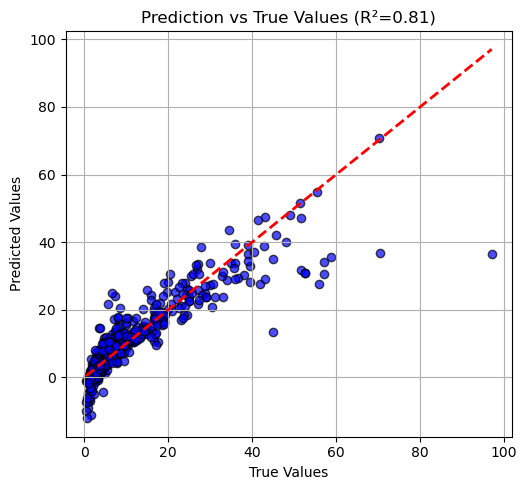

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Fit the Linear Regression model
lr_clf.fit(X_train, y_train)

# Get predictions on the test set
y_pred = lr_clf.predict(X_test)

# Calculate validation score (R²)
val_score = r2_score(y_test, y_pred)

# Plot True vs Predicted values
plt.figure(figsize=(10, 5))

# Scatter plot for Predicted vs True values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title(f"Prediction vs True Values (R²={val_score:.2f})")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

In [55]:
df = pd.read_csv('Test.csv')
df.dropna(subset=['Seats','Mileage','Engine','Power'], inplace=True)
df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [56]:
dummies_loca = pd.get_dummies(df.Location)
dummies_loca = dummies_loca.astype(int)
df2 = pd.concat([df,dummies_loca],axis='columns')
df3 = df2.drop('Location',axis='columns')

dummies_name = pd.get_dummies(df3.Name)
dummies_name = dummies_name.astype(int)
df4 = pd.concat([df3,dummies_name],axis='columns')
df4 = df4.drop('Name',axis='columns')

dummies_trans = pd.get_dummies(df4.Transmission)
dummies_trans = dummies_trans.astype(int)
df5 = pd.concat([df4,dummies_trans],axis='columns')
df5 = df5.drop('Transmission',axis='columns')

dummies_fuel = pd.get_dummies(df5.Fuel_Type)
dummies_fuel = dummies_fuel.astype(int)
df6 = pd.concat([df5,dummies_fuel],axis='columns')
df6 = df6.drop('Fuel_Type',axis='columns')

dummies_owner = pd.get_dummies(df6.Owner_Type)
dummies_owner = dummies_owner.astype(int)
df7 = pd.concat([df6,dummies_owner],axis='columns')
df7 = df7.drop('Owner_Type',axis='columns')
df7.head()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ahmedabad,Bangalore,...,Volvo XC60 D4 Summum,Volvo XC60 D5,Automatic,Manual,Diesel,Petrol,First,Fourth & Above,Second,Third
0,0,2013,84175,23.4 kmpl,1248 CC,74 bhp,5.0,6.95,0,0,...,0,0,0,1,1,0,1,0,0,0
1,1,2012,62282,16.95 kmpl,1197 CC,78.9 bhp,5.0,2.90,0,0,...,0,0,1,0,0,1,1,0,0,0
2,2,2017,37460,18.6 kmpl,1197 CC,81.86 bhp,5.0,6.28,0,0,...,0,0,0,1,0,1,1,0,0,0
3,3,2011,106976,13.5 kmpl,2400 CC,215 bhp,5.0,13.80,0,0,...,0,1,1,0,1,0,1,0,0,0
4,4,2013,60000,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.75,0,0,...,0,0,0,1,0,1,1,0,0,0


In [57]:
df7['Power'] = pd.to_numeric(df7['Power'].str.replace(' bhp', ''), errors='coerce')
print(df7['Power'].isnull().sum())
df7.dropna(subset=['Power'], inplace=True)

df7['Engine'] = pd.to_numeric(df7['Engine'].str.replace(' CC', ''), errors='coerce')
print(df7['Engine'].isnull().sum())
df7.dropna(subset=['Engine'], inplace=True)

df7['Mileage'] = pd.to_numeric(df7['Mileage'].str.replace(' kmpl', ''), errors='coerce')
print(df7['Mileage'].isnull().sum())
df7.dropna(subset=['Mileage'], inplace=True)

18
0
0


In [58]:
df7.isnull().sum().head(10)

Unnamed: 0           0
Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Ahmedabad            0
Bangalore            0
dtype: int64

In [76]:
X1 = df7.drop(['Price'],axis='columns')
y1 = df7.Price 
lr_clf.score(X1,y1)


0.9442130798901696

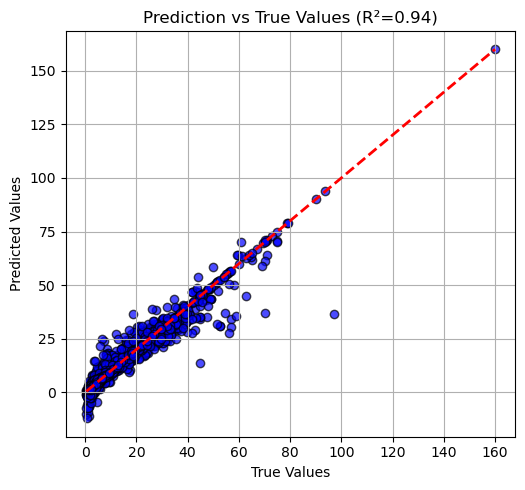

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Get predictions on the test set
y_pred = lr_clf.predict(X1)

# Calculate validation score (R²)
val_score = r2_score(y1, y_pred)

# Plot True vs Predicted values
plt.figure(figsize=(10, 5))

# Scatter plot for Predicted vs True values
plt.subplot(1, 2, 1)
plt.scatter(y1, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y1), max(y1)], [min(y1), max(y1)], color='red', linestyle='--', linewidth=2)
plt.title(f"Prediction vs True Values (R²={val_score:.2f})")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()